In [ ]:
"""
- Vanilla VGG transfer learning
"""

In [ ]:
import tensorflow
from matplotlib import pyplot
from keras.datasets import cifar10
from emnist import extract_training_samples
from tensorflow.keras import *
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from utils import show_dataset
import utils

%matplotlib inline

# VGG19 transfer learning

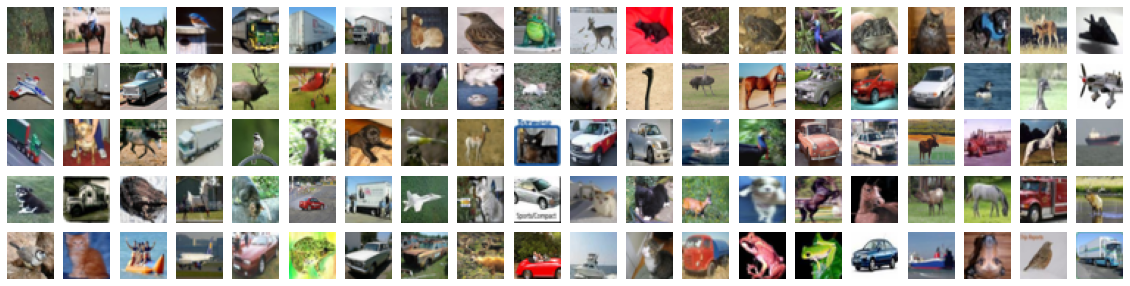

In [ ]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_dataset(x_train)


num_classes = 10 
x_train = x_train/255.
y_train = utils.to_categorical(y_train, num_classes) 

x_test = x_test/255.
y_test = utils.to_categorical(y_test, num_classes) 


In [ ]:
# rozpoznawanie cyferek VGG19 transfer learning
from keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))
conv_base.trainable = False

print(conv_base.summary())



Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(num_classes, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, batch_size=128, epochs=EPOCHS,validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 287s 733ms/step - loss: 1.6039 - accuracy: 0.4313 - val_loss: 1.3615 - val_accuracy: 0.5195
Epoch 2/10
391/391 [==============================] - 286s 731ms/step - loss: 1.3809 - accuracy: 0.5136 - val_loss: 1.3058 - val_accuracy: 0.5395
Epoch 3/10
391/391 [==============================] - 283s 724ms/step - loss: 1.3173 - accuracy: 0.5390 - val_loss: 1.2441 - val_accuracy: 0.5628
Epoch 4/10
391/391 [==============================] - 294s 751ms/step - loss: 1.2822 - accuracy: 0.5508 - val_loss: 1.2224 - val_accuracy: 0.5717
Epoch 5/10
391/391 [==============================] - 366s 937ms/step - loss: 1.2482 - accuracy: 0.5620 - val_loss: 1.2016 - val_accuracy: 0.5786
Epoch 6/10
391/391 [==============================] - 335s 856ms/step - loss: 1.2269 - accuracy: 0.5718 - val_loss: 1.1861 - val_accuracy: 0.5821
Epoch 7/10
391/391 [==============================] - 339s 866ms/step - loss: 1.2088 - accuracy: 0.5780 - val_loss: 1.1707 -

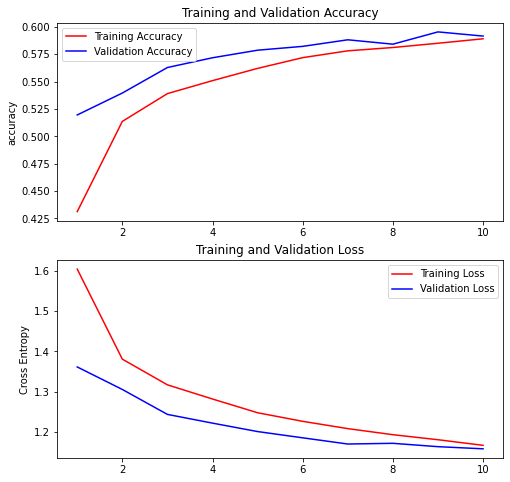

In [ ]:
# model3.evaluate(x_test, y_test, verbose=0)

print_history_chart(history3)